# Titanic Dataset #

This dataset consist of people who where on the titanic during the tragedy day. Each individual is represent by a set of features. \
Based upon this feature, this task of this dataset is to predict whether the individual will survive or not. 

## Preprocessing the dataset ##

Here we will preprocess the dataset: dropping non-informative columns, encoding the categorical columns, and scaling the data

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('datasets/titanic.csv')
data = data.drop(['name'], axis = 1)

data_label = data['survived']
data_feature = data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

x_train, x_test, y_train, y_test = train_test_split(data_feature, data_label, test_size=0.33)

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(x_train)
x_train = pd.DataFrame(imputer.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)
def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    # create dataframe from encoded features with named columns
    new_cols = pd.DataFrame(new_feats, columns=encoder.get_feature_names_out(features_name))
    new_df = pd.concat([df, new_cols], axis=1)    
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

encoder = OneHotEncoder(sparse_output=False, drop='first')
f_names = ['sex', 'embarked']
encoder.fit(x_train[f_names])
x_train = ohe_new_features(x_train, f_names, encoder)
x_test = ohe_new_features(x_test, f_names, encoder)

# feature scaling
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
x_train

x_train_NOT_numpy = x_train

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Testing the Logistic Regression # 

Here we will test the logistic regression against two optimizers: evolutionary based and gradient based

In [3]:
import sys
sys.path.append('..')  
from evo_learn.logistic_regression import LogisticRegression

## Gradient Based Optimizer ## 

Let's define the classifier, and train it.

In [7]:
clf = LogisticRegression()
clf.fit(x_train, y_train, max_iterations=1000, gradient_optimizer=True)
w = clf.get_weights()

The classification report as follows

In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67       255
           1       0.53      0.56      0.54       177

    accuracy                           0.62       432
   macro avg       0.61      0.61      0.61       432
weighted avg       0.62      0.62      0.62       432



The ROC curve with corresponding AUC score

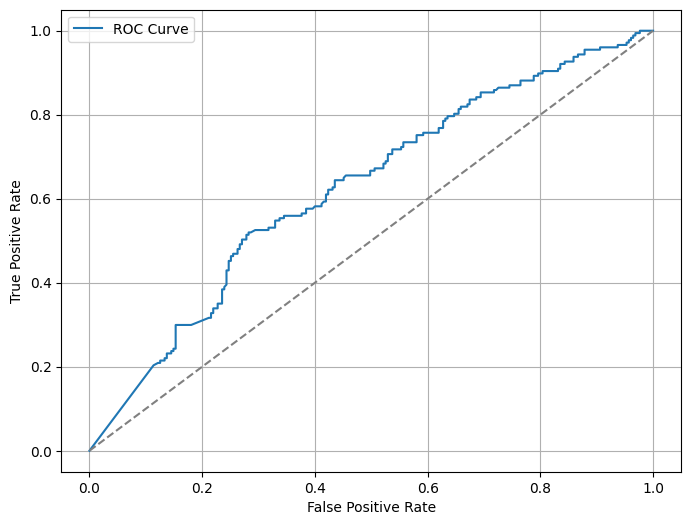

AUC Score for Gradient-Based Optimizer: 0.6248698349396256


In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
predictions_proba = clf.predict_proba(x_test)

fpr, tpr, threshold = roc_curve(y_test, predictions_proba)

fig = plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), linestyle='dashed', color = 'gray')
plt.legend()
plt.show()
print(f'AUC Score for Gradient-Based Optimizer: {roc_auc_score(y_test, predictions_proba)}')


## Evolutionary Based Optimizer ## 

Let's define the new classifier and fit it with evolutionary optimizer

In [8]:
clf = LogisticRegression()
clf.fit(x_train, y_train, max_iterations=250, gradient_optimizer=False, num_runs=5)
w = clf.get_weights()

Iteration: 1, Queen: [-4884.0, -272.2, -209.5, -1766.0, -1011.5, -0.2878, -23520.0, 8.76e-06, 0.001719], Fitness: 5.093517758104355
Iteration: 2, Queen: [-4884.0, -272.2, -209.5, -1766.0, -1011.5, -0.2878, -23520.0, 8.76e-06, 0.001719], Fitness: 5.093517758104355
Iteration: 3, Queen: [-4884.0, -272.2, -209.5, -12080.0, -0.00103, -8.36, -23520.0, 8.76e-06, 0.001719], Fitness: 4.909731035737196
Iteration: 4, Queen: [-4884.0, -272.2, -209.5, -12080.0, -0.00103, -8.36, -23520.0, 8.76e-06, 0.001719], Fitness: 4.909731035737196
Iteration: 5, Queen: [-4884.0, -272.2, -209.5, -12080.0, -0.00103, -8.36, -23520.0, 8.76e-06, 0.001719], Fitness: 4.909731035737196
Iteration: 6, Queen: [-5908.0, -0.015, 2658.0, -10290.0, -0.00103, -8.36, -23520.0, 8.76e-06, 0.001719], Fitness: 4.830965297094641
Iteration: 7, Queen: [-5908.0, -0.015, 2658.0, -10290.0, -0.00103, -8.36, -23520.0, 8.76e-06, 0.001719], Fitness: 4.830965297094641
Iteration: 8, Queen: [-5908.0, -0.015, 2658.0, -10290.0, -0.00103, -8.36, -2

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       280
           1       0.75      0.73      0.74       152

    accuracy                           0.82       432
   macro avg       0.80      0.80      0.80       432
weighted avg       0.82      0.82      0.82       432



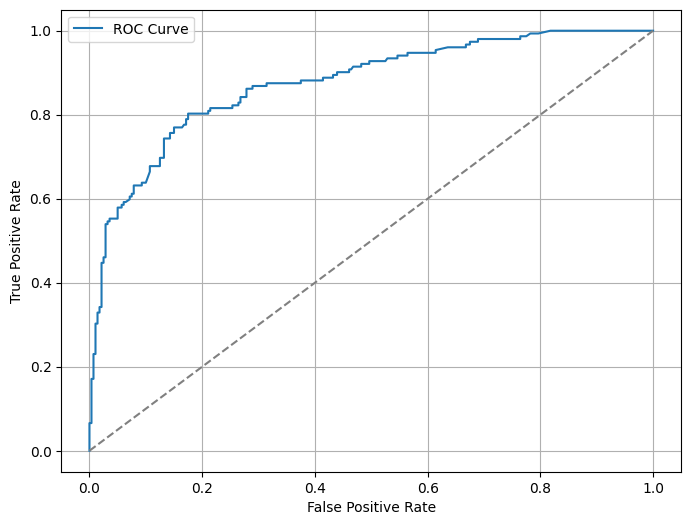

AUC Score for Gradient-Based Optimizer: 0.8742598684210527


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
predictions_proba = clf.predict_proba(x_test)

fpr, tpr, threshold = roc_curve(y_test, predictions_proba)

fig = plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), linestyle='dashed', color = 'gray')
plt.legend()
plt.show()
print(f'AUC Score for Gradient-Based Optimizer: {roc_auc_score(y_test, predictions_proba)}')


# Conclusion #



- As seen, the Evolutionary based optimizer hardly outperforms the gradient-based optimizer. The difference between AUC scores is in range of 0.10
- However, Evolutionary Algorithms also take a lot of time to find weights, while Gradient Based optimizer found it immediately


# Hyperparameter tuner (demonstration)

In [ ]:
from evo_learn.hyperparameter_tuner import HyperparameterTuner

# Initialize the HyperparameterTuner and tune the model
tuner = HyperparameterTuner()
best_params, best_auc, best_model = tuner.tune(x_train, y_train, x_test, y_test)

# Unpack the best hyperparameters
optimizer_type, regularization, C, max_iterations, num_runs_or_lr = best_params

# Print the best hyperparameter details and AUC
print(f"Best Optimizer: {optimizer_type}")
if optimizer_type == 'gradient':
    print(f"Best Hyperparameters: lr={num_runs_or_lr}, C={C}, regularization={regularization}, max_iterations={max_iterations}")
else:
    print(f"Best Hyperparameters: num_runs={num_runs_or_lr}, C={C}, regularization={regularization}, max_iterations={max_iterations}")
print(f"Best AUC: {best_auc}")

c:\Users\Dinar\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Iteration: 1, Queen: [np.float16(-15570.0), np.float16(0.236), np.float16(0.4568), np.float16(5.77e-05), np.float16(0.02847), np.float16(-0.849), np.float16(-12190.0), np.float16(-0.000791), np.float16(1.035)], Fitness: 5.1583269650151715
Iteration: 2, Queen: [np.float16(-15570.0), np.float16(0.236), np.float16(0.4568), np.float16(5.77e-05), np.float16(0.02847), np.float16(-0.849), np.float16(-12190.0), np.float16(-0.000791), np.float16(1.035)], Fitness: 5.1583269650151715
Iteration: 3, Queen: [np.float16(-15570.0), np.float16(0.236), np.float16(-25.19), np.float16(-429.8), np.float16(-0.02829), np.float16(-0.849), np.float16(-12190.0), np.float16(-0.000791), np.float16(1.035)], Fitness: 5.099916582234817
Iteration: 4, Queen: [np.float16(-15570.0), np.float16(0.236), np.float16(-25.19), np.float16(-429.8), np.float16(-0.02829), np.float16(-0.849), np.float16(-12190.0), np.float16(-0.000791), np.float16(1.035)], Fitness: 5.099916582234817
Iteration: 5, Queen: [np.float16(-15570.0), np.f

c:\Users\Dinar\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Iteration: 1, Queen: [np.float16(-80.1), np.float16(4.152), np.float16(0.000446), np.float16(-680.5), np.float16(-15070.0), np.float16(0.4448), np.float16(-22400.0), np.float16(0.0983), np.float16(-497.5)], Fitness: 5.324302074757533
Iteration: 2, Queen: [np.float16(-80.1), np.float16(4.152), np.float16(0.000446), np.float16(-12936.0), np.float16(-0.000346), np.float16(-0.003832), np.float16(-22400.0), np.float16(0.0983), np.float16(-497.5)], Fitness: 5.181703691609817
Iteration: 3, Queen: [np.float16(-80.1), np.float16(4.152), np.float16(0.000446), np.float16(-12936.0), np.float16(-0.000346), np.float16(-0.003832), np.float16(-22400.0), np.float16(0.0983), np.float16(-497.5)], Fitness: 5.181703691609817
Iteration: 4, Queen: [np.float16(-80.1), np.float16(4.152), np.float16(0.000446), np.float16(-12936.0), np.float16(-0.000346), np.float16(-0.003832), np.float16(-22400.0), np.float16(0.0983), np.float16(-497.5)], Fitness: 5.181703691609817
Iteration: 5, Queen: [np.float16(-80.1), np.fl

c:\Users\Dinar\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Iteration: 1, Queen: [np.float16(-0.0001341), np.float16(32.03), np.float16(2.264), np.float16(-0.0001118), np.float16(-5.36e-06), np.float16(0.02507), np.float16(-4612.0), np.float16(-4.46), np.float16(-0.0007315)], Fitness: 5.1713274532964215
Iteration: 2, Queen: [np.float16(-2.13e-05), np.float16(5.89e-05), np.float16(-0.00576), np.float16(-0.0001118), np.float16(-5.36e-06), np.float16(0.02507), np.float16(-4612.0), np.float16(-4.46), np.float16(-0.0007315)], Fitness: 5.1589983517339215
Iteration: 3, Queen: [np.float16(-2.13e-05), np.float16(5.89e-05), np.float16(-0.00576), np.float16(-0.0001118), np.float16(-5.36e-06), np.float16(0.02507), np.float16(-4612.0), np.float16(-4.46), np.float16(-0.0007315)], Fitness: 5.1589983517339215
Iteration: 4, Queen: [np.float16(-2.13e-05), np.float16(5.89e-05), np.float16(-0.00576), np.float16(-0.0001118), np.float16(-5.36e-06), np.float16(0.02507), np.float16(-4612.0), np.float16(-4.46), np.float16(-0.0007315)], Fitness: 5.1589983517339215
Itera

c:\Users\Dinar\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Iteration: 1, Queen: [np.float16(-0.0004108), np.float16(0.000488), np.float16(0.08374), np.float16(5.34e-05), np.float16(-0.0994), np.float16(-0.00010127), np.float16(-159.5), np.float16(0.3003), np.float16(4.188)], Fitness: 5.1264360958745465
Iteration: 2, Queen: [np.float16(-0.0004108), np.float16(0.000488), np.float16(0.08374), np.float16(5.34e-05), np.float16(-0.0994), np.float16(-0.00010127), np.float16(-159.5), np.float16(0.3003), np.float16(4.188)], Fitness: 5.1264360958745465
Iteration: 3, Queen: [np.float16(-0.0004108), np.float16(0.000488), np.float16(0.08374), np.float16(5.34e-05), np.float16(-0.0994), np.float16(-0.00010127), np.float16(-159.5), np.float16(0.3003), np.float16(4.188)], Fitness: 5.1264360958745465
Iteration: 4, Queen: [np.float16(-0.0004108), np.float16(0.000488), np.float16(0.08374), np.float16(5.34e-05), np.float16(-0.3352), np.float16(1.31), np.float16(0.1254), np.float16(0.3003), np.float16(4.188)], Fitness: 2.072717408242865
Iteration: 5, Queen: [np.flo

c:\Users\Dinar\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Iteration: 1, Queen: [np.float16(17.86), np.float16(91.6), np.float16(525.5), np.float16(0.2081), np.float16(-0.01387), np.float16(55.62), np.float16(-11120.0), np.float16(0.001677), np.float16(0.02765)], Fitness: 5.3006609493901715
Iteration: 2, Queen: [np.float16(17.86), np.float16(91.6), np.float16(525.5), np.float16(0.2081), np.float16(-0.01387), np.float16(55.62), np.float16(-11120.0), np.float16(0.001677), np.float16(0.02765)], Fitness: 5.3006609493901715
Iteration: 3, Queen: [np.float16(17.86), np.float16(91.6), np.float16(525.5), np.float16(0.2081), np.float16(-0.01387), np.float16(55.62), np.float16(-11120.0), np.float16(0.001677), np.float16(0.02765)], Fitness: 5.3006609493901715
Iteration: 4, Queen: [np.float16(-59.72), np.float16(-0.02681), np.float16(-1.42e-05), np.float16(0.2081), np.float16(-0.01387), np.float16(55.62), np.float16(-11120.0), np.float16(0.001677), np.float16(0.02765)], Fitness: 5.1775530392339215
Iteration: 5, Queen: [np.float16(-59.72), np.float16(-0.026

In [ ]:
# Predict class labels using the best model
predictions = best_model.predict(x_test)

# Generate and print a classification report using scikit-learn
print("\nClassification Report:")
print(classification_report(y_test, predictions))

In [ ]:
# Obtain predicted probabilities for the positive class for ROC computation.
# (If predict_proba returns multiple columns, adjust the index as needed.)
predictions_proba = best_model.predict_proba(x_test).flatten()

# Compute ROC curve components
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.grid(True)
# Plot the dashed gray diagonal representing random performance
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), linestyle='dashed', color='gray')
plt.legend()
plt.show()

# Compute and print the AUC score for further validation
computed_auc = roc_auc_score(y_test, predictions_proba)
print(f'Computed AUC Score: {computed_auc}')